In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import nltk # is a comprehensive suite of libraries and programs for natural language processing (NLP) in Python.
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Install required package
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the dataset
import datasets
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Analyze data
print(df.describe())

          comment_id   annotator_id       platform      sentiment  \
count  135556.000000  135556.000000  135556.000000  135556.000000   
mean    23530.416138    5567.097812       1.281352       2.954307   
std     12387.194125    3230.508937       1.023542       1.231552   
min         1.000000       1.000000       0.000000       0.000000   
25%     18148.000000    2719.000000       0.000000       2.000000   
50%     20052.000000    5602.500000       1.000000       3.000000   
75%     32038.250000    8363.000000       2.000000       4.000000   
max     50070.000000   11142.000000       3.000000       4.000000   

             respect        insult      humiliate         status  \
count  135556.000000  135556.00000  135556.000000  135556.000000   
mean        2.828875       2.56331       2.278638       2.698575   
std         1.309548       1.38983       1.370876       0.898500   
min         0.000000       0.00000       0.000000       0.000000   
25%         2.000000       2.00000    

In [ ]:
print(df.isnull().sum()) # helpful way to quickly identify if there are any missing values in a DataFrame and which columns they are in.

comment_id                      0
annotator_id                    0
platform                        0
sentiment                       0
respect                         0
                               ..
annotator_religion_other        0
annotator_sexuality_bisexual    0
annotator_sexuality_gay         0
annotator_sexuality_straight    0
annotator_sexuality_other       0
Length: 131, dtype: int64


In [ ]:
# Fill missing values
df['text'].fillna('', inplace=True)
df['hate_speech_score'].fillna(-2, inplace=True)

In [ ]:
# data cleaning
#prepare the text data in the text column of a pandas DataFrame df for analysis or machine learning
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() #will be used to lemmatize words later in the code.
df['text'] = df['text'].str.replace('[^a-zA-Z\s]', '') # remove non-alphabetical characters
df['text'] = df['text'].str.lower() # convert to lowercase
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split()])) # lemmatize words


<ipython-input-24-20380574b8bc>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^a-zA-Z\s]', '') # remove non-alphabetical characters


In [ ]:
# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000) # set the maximum number of features to 5000 to reduce the risk of overfitting
X_train = vectorizer.fit_transform(train_df["text"]) # turn text into numbers, applies the TfidfVectorizer to the text data in the text column of train_df and stores the resulting matrix of numerical features in X_train. The fit_transform() method of the TfidfVectorizer object is used to fit the vectorizer to the training data and transform the text data into a matrix of numerical features.
y_train = train_df["hate_speech_score"] >= -1 #hate_speech_score is greater than or equal to -1, the corresponding label is True (1), indicating that the text is considered to be hate speech. If the hate_speech_score is less than -1, the label is False (0), indicating that the text is not considered to be hate speech.

#transform text data into numerical features that can be used to train a machine learning model.


In [ ]:
# Train logistic regression model
#Logistic regression is a popular machine learning algorithm used for binary classification tasks, such as identifying whether a text is considered to be hate speech or not.
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


# Vectorize test data and predict labels
X_test = vectorizer.transform(test_df["text"])
y_test = test_df["hate_speech_score"] >= -1
y_pred = lr_model.predict(X_test)

# Evaluate logistic regression model's performance
accuracy = accuracy_score(y_test, y_pred)                                                        #accuracy is a measure of how many of the tweets the model correctly classified as harmful or non-harmful.
print("Logistic Regression Model Accuracy: {:.2f}%".format(accuracy * 100)) 

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 score: {:.2f}%".format(f1 * 100))


Logistic Regression Model Accuracy: 87.03%
F1 score: 89.34%


In [ ]:


# Instantiate & train decision tree model 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Classify the test section with the decision tree model
pred = dt_model.predict(X_test)

# Evaluate decision tree model's accuracy
accuracy = accuracy_score(y_test, pred)
print("Decision Tree Model Accuracy: {:.2f}%".format(accuracy * 100)) 


f1 = f1_score(y_test, pred)
print("F1 score: {:.2f}%".format(f1 * 100))

Decision Tree Model Accuracy: 95.55%
F1 score: 96.30%


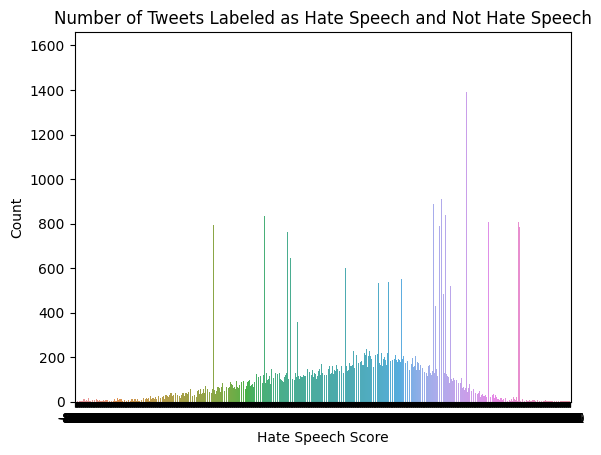

In [ ]:
sns.countplot(x='hate_speech_score', data=df)
plt.title("Number of Tweets Labeled as Hate Speech and Not Hate Speech")
plt.xlabel("Hate Speech Score")
plt.ylabel("Count")
plt.show()


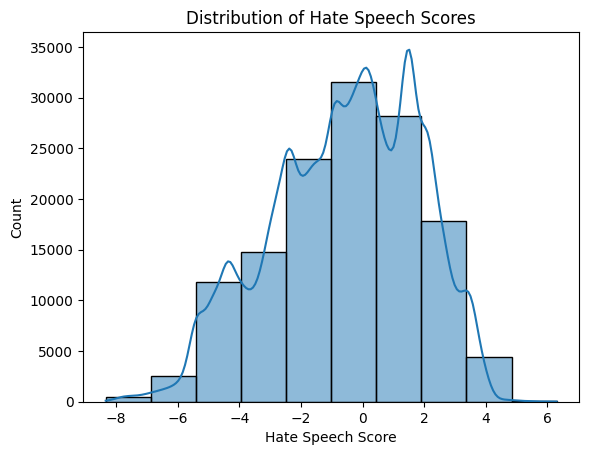

In [ ]:
sns.histplot(df, x="hate_speech_score", bins=10, kde=True)
# Set plot title and axis labels
plt.title("Distribution of Hate Speech Scores")
plt.xlabel("Hate Speech Score")
plt.ylabel("Count")

# Show the plot
plt.show()